In [1]:
# Import packages pulp and pandas
import pandas as pd
import numpy as np
from pulp import *
import matplotlib.pyplot as plt

In [2]:
file1 = (r'C:\Users\zachary.fort\Documents\Data Sets\NBA_PLAYER_BOX_SCORES_2021.xlsx')
data = pd.read_excel(file1, sheet_name = 0, header=0)
data.describe()

,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,...,TOV,PF,+/-,FPTS,FPTS/MIN,PTS_DIFF,OPP_DEFRTG,OPP_REB%,OPP_TOV%,OPP_PACE
count,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,...,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.00000
mean,22.693623,10.529035,3.870369,8.305887,1.193757,3.254498,1.594540,2.050143,0.923495,3.239223,...,1.243498,1.814214,-0.000891,21.276011,0.886601,0.176280,111.487384,50.013609,13.888783,99.69756
std,10.511594,8.652074,3.214721,5.931299,1.500419,3.026761,2.234617,2.691348,1.317078,2.736013,...,1.397114,1.438487,11.414117,14.498026,0.445033,9.359054,2.575925,1.633672,1.072825,1.84060
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-50.000000,-3.000000,-1.000000,-48.554717,106.000000,47.200000,11.500000,96.46000
25%,15.000000,4.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,-7.000000,10.000000,0.603671,-6.100000,110.000000,48.900000,13.200000,98.27000
50%,24.000000,9.000000,3.000000,7.000000,1.000000,3.000000,1.000000,1.000000,0.000000,3.000000,...,1.000000,2.000000,0.000000,19.400000,0.869631,-0.651627,111.700000,49.500000,14.000000,99.36000
75%,31.000000,15.000000,6.000000,12.000000,2.000000,5.000000,2.000000,3.000000,1.000000,5.000000,...,2.000000,3.000000,7.000000,30.225000,1.150000,5.884332,112.600000,51.400000,14.600000,100.81000
max,51.000000,62.000000,21.000000,37.000000,11.000000,21.000000,19.000000,24.000000,12.000000,20.000000,...,10.000000,6.000000,54.000000,93.900000,5.500000,52.137288,117.900000,52.900000,15.600000,104.74000


In [3]:
data['EMA2'] = ((data.groupby(['PLAYER'])['FPTS'].transform(lambda x: x.ewm(span=2).mean())))

In [4]:
avg_fpts = pd.DataFrame(data.groupby('PLAYER')['FPTS'].mean())
avg_fpts

,FPTS
PLAYER,
Aaron Gordon,26.781250
Aaron Holiday,13.292424
Aaron Nesmith,9.917778
Abdel Nader,12.537500
Adam Mokoka,2.500000
...,...
Yogi Ferrell,12.266667
Yuta Watanabe,11.277551
Zach LaVine,40.979310


In [5]:
pd.DataFrame(data.groupby('PLAYER')['FPTS'].mean())

,FPTS
PLAYER,
Aaron Gordon,26.781250
Aaron Holiday,13.292424
Aaron Nesmith,9.917778
Abdel Nader,12.537500
Adam Mokoka,2.500000
...,...
Yogi Ferrell,12.266667
Yuta Watanabe,11.277551
Zach LaVine,40.979310


In [6]:
data.set_index('PLAYER').groupby(level='PLAYER').agg(['last']).stack()

,,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,OPP,FPTS/MIN,PTS_DIFF,POSITION,OPP_POS,OPP_DEFRTG,OPP_REB%,OPP_TOV%,OPP_PACE,EMA2
PLAYER,,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,last,DEN,DEN @ MIN,2021-05-13,W,30,15,6,10,60,1,...,MIN,0.886667,-0.181250,PF,MIN-PF,115.2,48.0,14.0,101.88,27.370015
Aaron Holiday,last,IND,IND @ CLE,2021-05-10,W,21,1,0,5,0,0,...,CLE,0.557143,-1.592424,PG,CLE-PG,111.9,49.5,15.5,98.12,13.672814
Aaron Nesmith,last,BOS,BOS @ MIN,2021-05-15,W,22,9,4,8,50,1,...,MIN,0.650000,4.382222,SF,MIN-SF,115.2,48.0,14.0,101.88,16.219048
Abdel Nader,last,PHX,PHX vs. LAL,2021-03-21,W,11,5,2,2,100,1,...,LAL,1.090909,-0.537500,SF,LAL-SF,106.0,51.2,15.5,99.01,12.891428
Adam Mokoka,last,CHI,CHI @ BKN,2021-05-15,L,2,0,0,1,0,0,...,BKN,-0.500000,-3.500000,SG,BKN-SG,113.2,50.7,13.7,100.33,-0.844435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yogi Ferrell,last,LAC,LAC @ HOU,2021-05-14,L,30,6,2,10,20,0,...,HOU,0.960000,16.533333,PG,HOU-PG,113.2,47.2,14.4,101.11,19.974251
Yuta Watanabe,last,TOR,TOR @ CHI,2021-05-13,L,9,0,0,3,0,0,...,CHI,0.655556,-5.377551,SG,CHI-SG,112.5,51.7,15.3,100.17,9.839502
Zach LaVine,last,CHI,CHI vs. TOR,2021-05-13,W,35,24,8,15,53.3,3,...,TOR,0.857143,-10.979310,PG,TOR-PG,111.3,48.0,13.5,99.85,34.867319


In [38]:
opp_pos = data.groupby(['OPP','POSITION','OPP_POS'])['PTS_DIFF','FPTS', 'FPTS/MIN'].mean().reset_index()
opp_c = opp_pos[opp_pos['POSITION']=='C'].reset_index(drop=True)
opp_pf = opp_pos[opp_pos['POSITION']=='PF'].reset_index(drop=True)
opp_sf = opp_pos[opp_pos['POSITION']=='SF'].reset_index(drop=True)
opp_sg = opp_pos[opp_pos['POSITION']=='SG'].reset_index(drop=True)
opp_pg = opp_pos[opp_pos['POSITION']=='PG'].reset_index(drop=True)

In [39]:
def opp_process(opp):
    fpts_mu = opp['FPTS'].mean()
    diff_mu = opp['PTS_DIFF'].mean()
    fpts_min_mu = opp['FPTS/MIN'].mean()
    
    opp['FPTS_AGST_AVG'] = ''
    opp['DIFF_AGST_AVG'] = ''
    opp['FPTS_MIN_AGST_AVG'] = ''
    
    for i in range(len(opp_pg)):
        fpt = opp_pg.iloc[i]['FPTS'] / fpts_mu
        diff = opp_pg.iloc[i]['PTS_DIFF'] - diff_mu
        fpts_min = opp_pg.iloc[i]['FPTS/MIN'] / fpts_min_mu
        opp.at[i, 'FPTS_AGST_AVG'] = fpt
        opp.at[i, 'DIFF_AGST_AVG'] = diff
        opp.at[i, 'FPTS_MIN_AGST_AVG'] = fpts_min
    return opp
    

In [41]:
opp_pg = opp_process(opp_pg)
opp_sg = opp_process(opp_sg)
opp_sf = opp_process(opp_sf)
opp_pf = opp_process(opp_pf)
opp_c = opp_process(opp_c)

In [28]:
fpts_mu = opp_pg['FPTS'].mean()
diff_mu = opp_pg['PTS_DIFF'].mean()
fpts_min_mu = opp_pg['FPTS/MIN'].mean()
#print(fpts_mu, diff_mu, fpts_min_mu)
for i in range(len(opp_pg)):
    fpt = opp_pg.iloc[i]['FPTS'] / fpts_mu
    diff = opp_pg.iloc[i]['PTS_DIFF'] - diff_mu
    fpts_min = opp_pg.iloc[i]['FPTS/MIN'] / fpts_min_mu

In [12]:
last = pd.DataFrame(data.set_index('PLAYER').groupby(level='PLAYER').agg(['last']).stack())
last = last.reset_index()[['PLAYER','POSITION','EMA2']]
last

,PLAYER,POSITION,EMA2
0,Aaron Gordon,PF,27.370015
1,Aaron Holiday,PG,13.672814
2,Aaron Nesmith,SF,16.219048
3,Abdel Nader,SF,12.891428
4,Adam Mokoka,SG,-0.844435
...,...,...,...
534,Yogi Ferrell,PG,19.974251
535,Yuta Watanabe,SG,9.839502
536,Zach LaVine,PG,34.867319
537,Zeke Nnaji,PF,13.281110


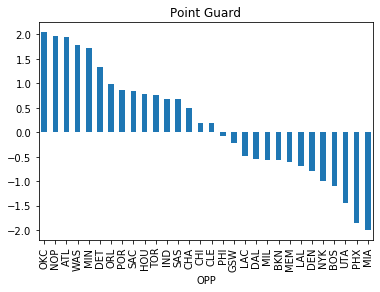

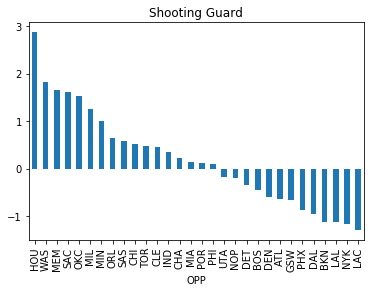

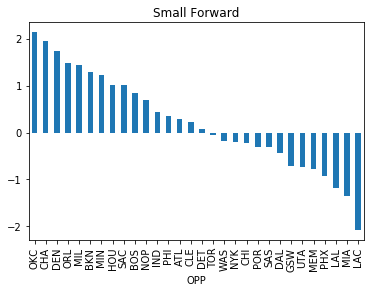

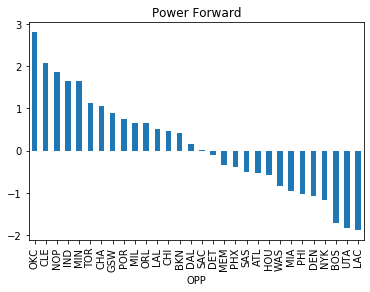

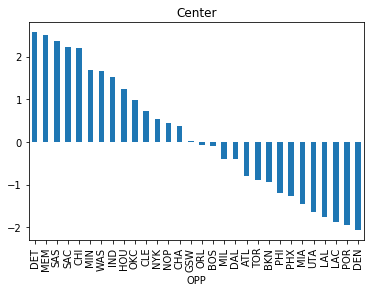

In [8]:
pg = data.where(data['POSITION']=='PG')
sg = data.where(data['POSITION']=='SG')
sf = data.where(data['POSITION']=='SF')
pf = data.where(data['POSITION']=='PF')
c = data.where(data['POSITION']=='C')
pg.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Point Guard')
plt.show()
sg.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Shooting Guard')
plt.show()
sf.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Small Forward')
plt.show()
pf.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Power Forward')
plt.show()
c.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Center')
plt.show()

In [9]:
## Add Regression analysis & JOIN Advanced Stats data set

## logic for vlookup equivalent df1.insert(2, 'MAKE', df1['MODEL'].map(df2.set_index('MODEL')['MAKE']))
## https://stackoverflow.com/questions/41511730/python-function-similar-to-vlookup-excel

In [10]:
data['EMA2'] = ((data.groupby(['PLAYER'])['FPTS'].transform(lambda x: x.ewm(span=2).mean())))
data['EMA2_DIFF']= (data['EMA2']-data['FPTS']).abs()
file = r'C:\Users\zacha\OneDrive\Documents\NBA_Data_Analysis_2021.xlsx'
writer = pd.ExcelWriter(file)
data.to_excel(writer, sheet_name='Data')
writer.save()

FileCreateError: [Errno 2] No such file or directory: 'C:\\Users\\zacha\\OneDrive\\Documents\\NBA_Data_Analysis_2021.xlsx'

In [ ]:
file = (r'C:\Users\zachary.fort\Documents\Data Sets\NBA_2021_Predictor.xlsx')
df = pd.read_excel(file, sheet_name = 0, header=0)

def pg_id(x):
    if x=='PG':
        return 1
    else:
        return 0
def sg_id(x):
    if x=='SG':
        return 1
    else:
        return 0
def sf_id(x):
    if x=='SF':
        return 1
    else:
        return 0
def pf_id(x):
    if x=='PF':
        return 1
    else:
        return 0
def c_id(x):
    if x=='C':
        return 1
    else:
        return 0
    
#One hot encoder for position
#label_encoder = LabelEncoder()
#df['NEW_POS'] = label_encoder.fit_transform(df['Position'])

df['PG'] = df['Position'].apply(pg_id)
df['SG'] = df['Position'].apply(sg_id)
df['SF'] = df['Position'].apply(sf_id)
df['PF'] = df['Position'].apply(pf_id)
df['C'] = df['Position'].apply(c_id)
df['Cost'] = [float(i) for i in df['Cost']]

#Clean data and convert to list- only look at rows with diet data and not constraint information
data = df.where(df['Cost'] > 0)
data = data.dropna()
data = data.values.tolist()

players = [x[0] for x in data]
cost = dict([(x[0], float(x[14])) for x in data])
position = dict([(x[0], x[1]) for x in data])
proj_pts = dict([(x[0], float(x[13])) for x in data])

pg = dict([(x[0], float(x[15])) for x in data])
sg = dict([(x[0], float(x[16])) for x in data])
sf = dict([(x[0], float(x[17])) for x in data])
pf = dict([(x[0], float(x[18])) for x in data])
c = dict([(x[0], float(x[19])) for x in data])

player_vars = LpVariable.dicts("Player", players, cat = "Integer", lowBound= 0, upBound = 1)

# create the optimization problem framework - maximize points while meeting requirements of maximum cost
prob = LpProblem("NBA_Optimize", LpMaximize)

#Define objective function for projected points
obj_func = lpSum([proj_pts[i] * player_vars[i] for i in players])
prob += obj_func

#Number of player choices constraint
constraint_2 = lpSum([player_vars[i] for i in player_vars]) == 8
prob += constraint_2 
 
#Cost Constraint
constraint_3 = lpSum([cost[f] * player_vars[f] for f in player_vars]) <= 200.0
prob += constraint_3

#Position Constraints
#PG
prob += lpSum([pg[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([pg[f] * player_vars[f] for f in player_vars]) <= 3

#SG
prob += lpSum([sg[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([sg[f] * player_vars[f] for f in player_vars]) <= 3

#G
prob += lpSum([(pg[f] * player_vars[f]) + (sg[f] * player_vars[f]) for f in player_vars]) >= 3
prob += lpSum([(pg[f] * player_vars[f]) + (sg[f] * player_vars[f]) for f in player_vars]) <= 4

#SF
prob += lpSum([sf[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([sf[f] * player_vars[f] for f in player_vars]) <= 3

#PF
prob += lpSum([pf[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([pf[f] * player_vars[f] for f in player_vars]) <= 3

#F
prob += lpSum([(sf[f] * player_vars[f]) + (pf[f] * player_vars[f]) for f in player_vars]) >= 3
prob += lpSum([(sf[f] * player_vars[f]) + (pf[f] * player_vars[f]) for f in player_vars]) <= 4

#C
prob += lpSum([c[f] * player_vars[f] for f in player_vars]) >= 1
prob += lpSum([c[f] * player_vars[f] for f in player_vars]) <= 2

#Solve the Objective Function
prob.solve()
# print the foods of the optimal diet
for i in prob.variables():
    if i.varValue>0:
        print(i.name, ":", i.varValue)
        
print("The total points are: {}".format(round(value(prob.objective),2)))